In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from tensorflow import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


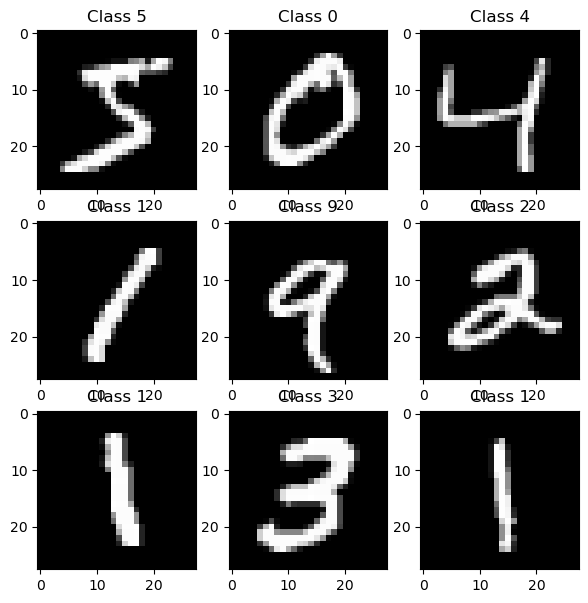

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.2507 - accuracy: 0.9248 - val_loss: 0.0971 - val_accuracy: 0.9698
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1004 - accuracy: 0.9694 - val_loss: 0.0809 - val_accuracy: 0.9743
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0725 - accuracy: 0.9776 - val_loss: 0.0720 - val_accuracy: 0.9770
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0561 - accuracy: 0.9823 - val_loss: 0.0755 - val_accuracy: 0.9789
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0456 - accuracy: 0.9848 - val_loss: 0.0648 - val_accuracy: 0.9813


In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 98.13%


In [10]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(classes_x == y_test)[0]
incorrect_indices = np.nonzero(classes_x != y_test)[0]

313/313 [==============================] - 0s 1ms/step


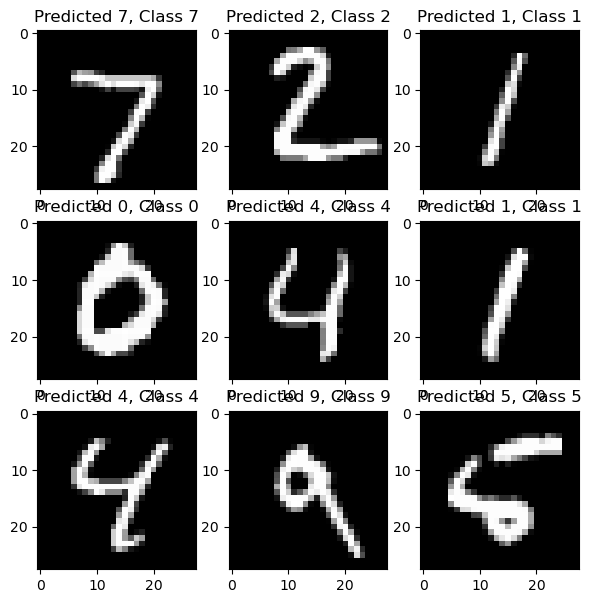

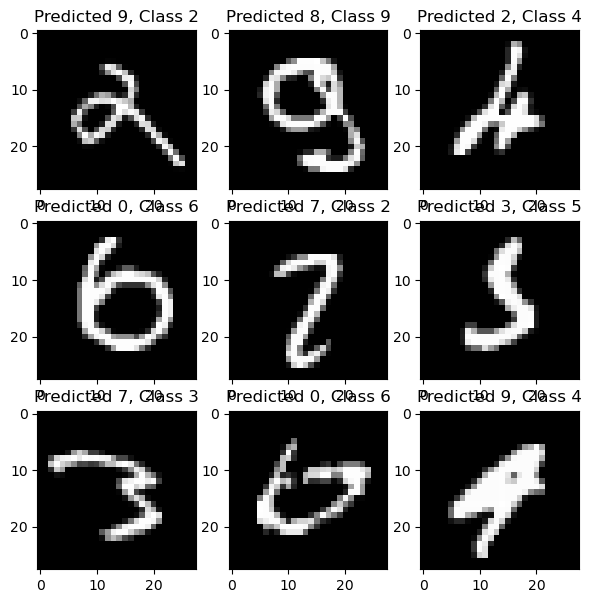

In [11]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[incorrect], y_test[incorrect]))

In [25]:
y_test[incorrect_indices]

array([2, 9, 4, 6, 2, 5, 3, 6, 4, 9, 8, 3, 8, 5, 8, 1, 5, 8, 9, 2, 8, 5,
       6, 4, 7, 4, 7, 4, 9, 5, 8, 5, 9, 7, 7, 8, 4, 2, 3, 3, 9, 8, 6, 8,
       9, 6, 8, 1, 7, 5, 4, 7, 3, 4, 6, 5, 8, 9, 0, 5, 9, 9, 2, 4, 2, 2,
       9, 6, 5, 4, 5, 4, 8, 3, 9, 3, 5, 2, 4, 6, 3, 9, 6, 3, 5, 8, 8, 9,
       7, 2, 4, 8, 4, 7, 2, 5, 1, 4, 8, 9, 2, 7, 2, 4, 2, 9, 3, 5, 8, 2,
       9, 6, 5, 4, 8, 7, 8, 8, 9, 4, 9, 8, 0, 3, 8, 3, 1, 7, 2, 1, 4, 3,
       8, 4, 4, 4, 5, 3, 5, 3, 8, 3, 9, 9, 9, 3, 8, 1, 2, 0, 0, 8, 8, 1,
       6, 0, 8, 8, 2, 2, 4, 6, 0, 8, 8, 8, 4, 7, 7, 7, 4, 8, 4, 9, 0, 2,
       4, 6, 5, 4, 8, 2, 5, 4, 2, 4, 2], dtype=uint8)